#### Q1. What is the mathematical formula for a linear SVM?

Ans: We all know the equation of a hyperplane is 

**w.x+b=0**

where w is a vector normal to hyperplane and b is an offset. 

If the value of w.x+b>0 then we can say it is a positive point otherwise it is a negative point.

#### Q2. What is the objective function of a linear SVM?

Ans: The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. To separate the two classes of data points, there are many possible hyperplanes that could be chosen.

#### Q3. What is the kernel trick in SVM?

Ans: A **Kernel Trick** is a simple method where a Non Linear data is projected onto a higher dimension space so as to make it easier to classify the data where it could be linearly divided by a plane. This is mathematically achieved by Lagrangian formula using Lagrangian multipliers.

#### Q4. What is the role of support vectors in SVM Explain with example.

Ans: **Support vectors** are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. 

Using these support vectors, we maximize the margin of the classifier. 

Deleting the support vectors will change the position of the hyperplane. 

These are the points that help us build our SVM.

#### Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

Ans: **HYPERPLANE** (in 2d; Center yellow line)

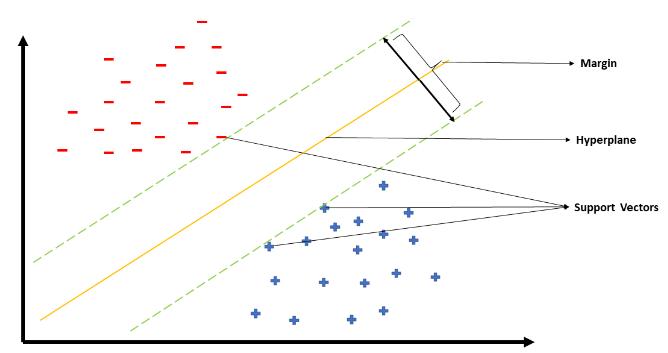

**MARGINAL PLANE** (in 2d; side yellow dashed lines)

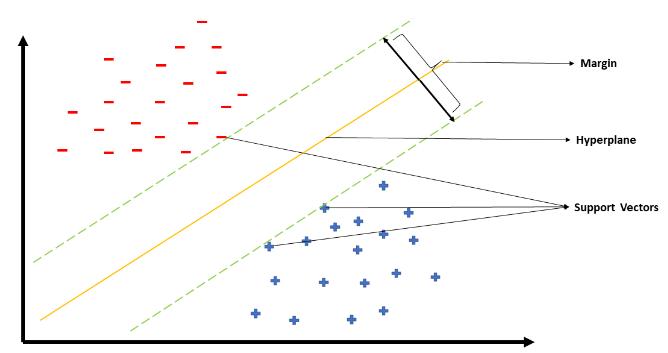

**HARD MARGIN** (Easily seperated)

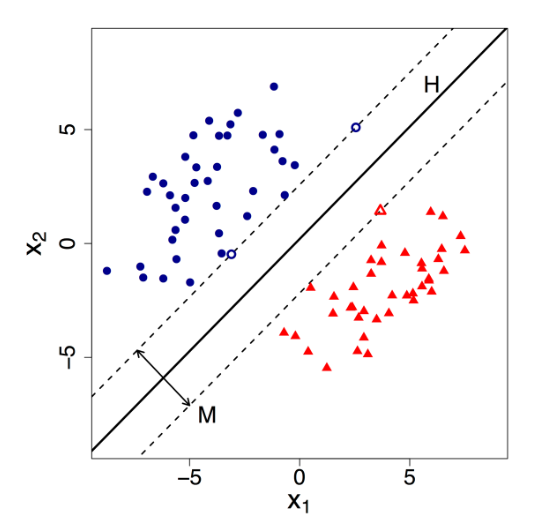

**SOFT MARGIN** (Not fully seperated)

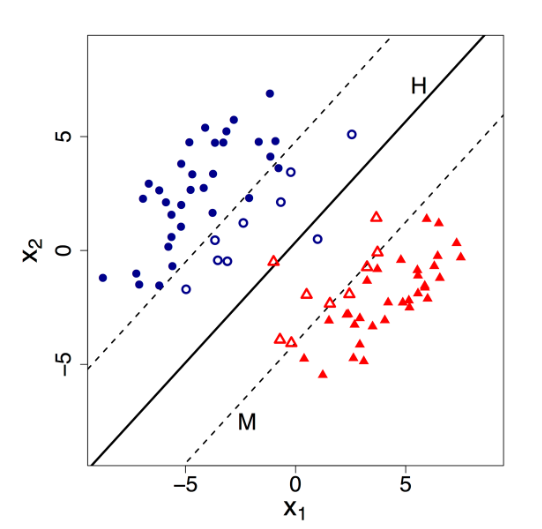

#### Q6. SVM Implementation through Iris dataset.
#### - Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
#### - Train a linear SVM classifier on the training set and predict the labels for the testing setl
#### - Compute the accuracy of the model on the testing setl
#### - Plot the decision boundaries of the trained model using two of the featuresl
#### - Try different values of the regularisation parameter C and see how it affects the performance of the model.

Accuracy of SVM model: 1.00


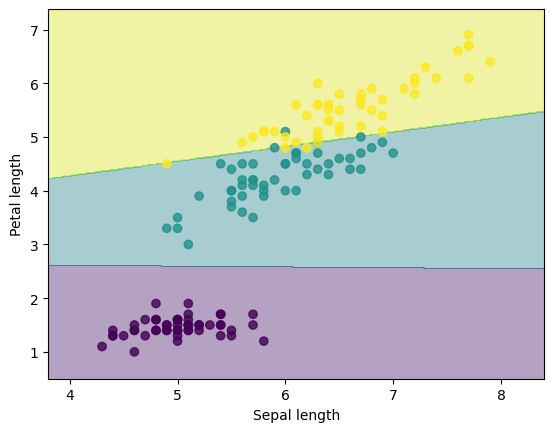

Accuracy of SVM model with C=0.01: 0.97
Accuracy of SVM model with C=0.1: 1.00
Accuracy of SVM model with C=1: 1.00
Accuracy of SVM model with C=10: 0.97
Accuracy of SVM model with C=100: 1.00


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', C=1)
svm.fit(X_train[:, [0, 2]], y_train)  

y_pred = svm.predict(X_test[:, [0, 2]])

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM model: {accuracy:.2f}")

x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 2].min() - 0.5, X[:, 2].max() + 0.5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 2], c=y, alpha=0.8)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.show()

for c in [0.01, 0.1, 1, 10, 100]:
    svm = SVC(kernel='linear', C=c)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of SVM model with C={c}: {accuracy:.2f}")